## 🏞️  **Notebook de treinamento {VAE - Fully Convolutional}**
***

> #### 📒 **Colab?**

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

!git clone https://github.com/cori4nder/vae-meandering-rivers

os.chdir('/content/vae-meandering-rivers')
!pwd

> ### 🔩 **Dependências**

In [ ]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [4]:
import torch
import torch.optim as optim

from train import Trainer
from utils.hdf5_utils import HDF5DataHandler
from analysis.plot_training_metrics import TrainingPlotter
from models.vae_fully_conv import VAE_FConv

> ### 🤖 **Treinando modelo**

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
handler = HDF5DataHandler('./train_images.h5', test_size=0.2)

In [7]:
handler.load_data(split=True, norm=True)

| Keys  >>  ['train_images']
| Shape >> (50000, 128, 128, 1)
| Normalizaed images >> float32 / 255.0
| Train - 80.0% >> (40000, 1, 128, 128)
| Test  - 20.0% >> (10000, 1, 128, 128)


In [8]:
# handler.resize(new_size=(128, 128))
# transforma em tensores e gera os loaders
handler.prepare_tensors()

# Obtenção dos DataLoaders
train_loader, test_loader = handler.get_loaders()

In [9]:
model = VAE_FConv().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

trainer = Trainer(model=model, optimizer=optimizer, device=device, train_loader=train_loader, epochs=50, batch_size=128)

In [10]:
trainer.train()

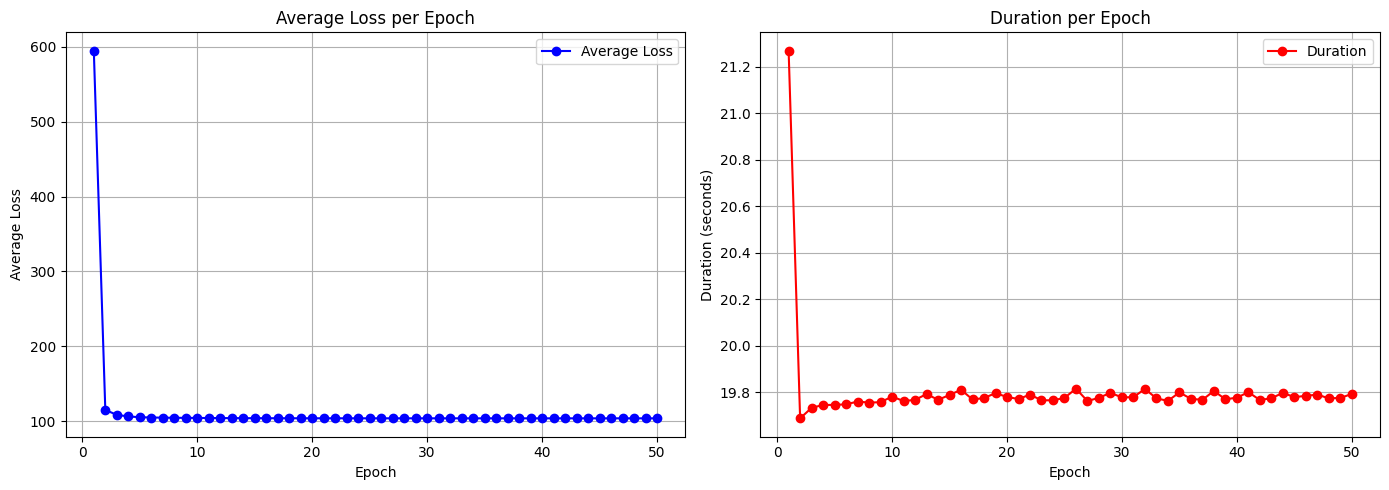

In [11]:
train_loss_plot = TrainingPlotter('training_log.csv')
train_loss_plot.plot_metrics()

In [25]:
!python train.py --path "./train_images.h5" --model "fconv"  --batch_size "128" --epochs "50"

| Keys  >>  ['train_images']
| Shape >> (50000, 128, 128, 1)
| Normalizaed images >> float32 / 255.0
| Train - 80.0% >> (40000, 1, 128, 128)
| Test  - 20.0% >> (10000, 1, 128, 128)
_________________________________________________________________________________

Epoch 1/100: 100% 313/313 [00:19<00:00, 16.19it/s]
>> Time 19.328381299972534 	Epoch 1 	Average Loss:  346.2595887061877

Epoch 2/100: 100% 313/313 [00:18<00:00, 16.54it/s]
>> Time 18.923482656478882 	Epoch 2 	Average Loss:  117.86938386085706

Epoch 3/100: 100% 313/313 [00:18<00:00, 16.55it/s]
>> Time 18.91405725479126 	Epoch 3 	Average Loss:  113.14085098413321

Epoch 4/100: 100% 313/313 [00:18<00:00, 16.53it/s]
>> Time 18.933493852615356 	Epoch 4 	Average Loss:  109.70435089942737

Epoch 5/100: 100% 313/313 [00:18<00:00, 16.53it/s]
>> Time 18.938952922821045 	Epoch 5 	Average Loss:  107.44339398848705

Epoch 6/100: 100% 313/313 [00:18<00:00, 16.49it/s]
>> Time 18.977424144744873 	Epoch 6 	Average Loss:  106.17883623563327

